In [1]:
from matplotlib import pyplot as plt
import numpy as np
import csv
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 

In [3]:
dataFrame = pd.read_csv('../dataset.csv')


In [12]:
trainSet  = dataFrame.iloc[:int(((len(dataFrame)*70)/100))]
testSet  = dataFrame.iloc[int(((len(dataFrame)*70)/100)):]
print(trainSet)

         step      type     amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT    9839.64  C1231006815      170136.00   
1           1   PAYMENT    1864.28  C1666544295       21249.00   
2           1  TRANSFER     181.00  C1305486145         181.00   
3           1  CASH_OUT     181.00   C840083671         181.00   
4           1   PAYMENT   11668.14  C2048537720       41554.00   
...       ...       ...        ...          ...            ...   
4453829   323   CASH_IN  260146.62   C607948707    12615813.90   
4453830   323   CASH_IN   96578.20  C1633723575    12875960.52   
4453831   323   CASH_IN   50533.48  C2104802211    12972538.71   
4453832   323   CASH_IN  281698.65    C39258029    13023072.19   
4453833   323  CASH_OUT   44289.10  C1121374675       17504.00   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282225         

In [4]:
dataFrame['merchant'] = dataFrame['nameDest'].str.contains('M')

dataFrame.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,True
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,True
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,False
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,False
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,True
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,True
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,True
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,True
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,True
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,False


In [5]:
dataFrame[['isFraud','merchant']].value_counts()

isFraud  merchant
0        False       4202912
         True        2151495
1        False          8213
dtype: int64

In [6]:
dataFrame['balancediffOrig'] = dataFrame['newbalanceOrig'] - dataFrame['oldbalanceOrg']
dataFrame['balancediffDest'] = dataFrame['newbalanceDest'] - dataFrame['oldbalanceDest']

dataFrame.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant,balancediffOrig,balancediffDest
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,True,-9839.64,0.00
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,True,-1864.28,0.00
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,False,-181.00,0.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,False,-181.00,-21182.00
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,True,-11668.14,0.00
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,True,-7817.71,0.00
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,True,-7107.77,0.00
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,True,-7861.64,0.00
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,True,-2671.00,0.00
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,False,-5337.77,-1549.21


<AxesSubplot:xlabel='isFraud', ylabel='balancediffOrig'>

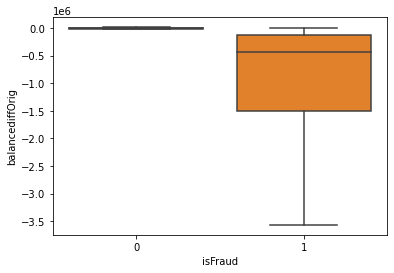

In [7]:
sns.boxplot(x="isFraud", y="balancediffOrig", data=dataFrame,showfliers=False)


<AxesSubplot:xlabel='isFraud', ylabel='balancediffDest'>

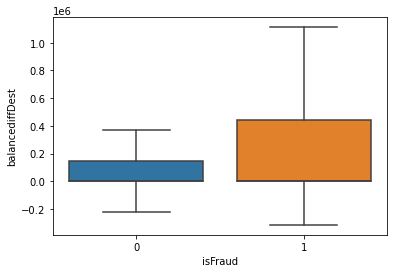

In [8]:
sns.boxplot(x="isFraud", y="balancediffDest", data=dataFrame, showfliers=False)

In [16]:
features = ['step',
            'type',
            'amount',
            'oldbalanceOrg',
            'newbalanceOrig',
            'oldbalanceDest',
            'newbalanceDest',
            'balancediffOrig',
            'balancediffDest',
            'merchant']

label = ['isFraud']

In [15]:
X = dataFrame[features]
y = dataFrame[label]

In [17]:
# After encoding (scroll right to see new columns)
X = X.join(pd.get_dummies(X[['type']], prefix='type')).drop(['type'], axis=1)
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,balancediffOrig,balancediffDest,merchant,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,-9839.64,0.0,True,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,-1864.28,0.0,True,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,-181.00,0.0,False,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,-181.00,-21182.0,False,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,-11668.14,0.0,True,0,0,0,1,0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4453834, 14)
(4453834, 1)
(1908786, 14)
(1908786, 1)
